#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 25 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [196]:
#Installing a python library for displaying your plans on a map
!pip install basemap
!pip install pandas

In [197]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,59.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


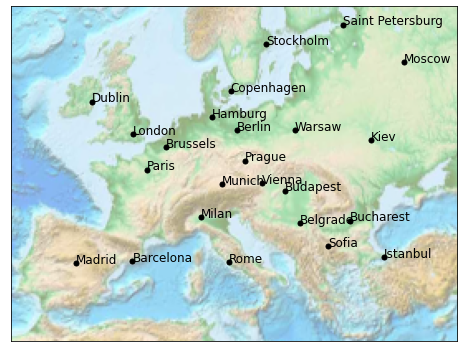

In [198]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
import pandas as pd


df = pd.read_csv("european_cities.csv", delimiter = ";")
data = [list(row) for row in df.values]

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=4E6, height=3E6, 
            lat_0=49, lon_0=13,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = m(location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [199]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig = plt.figure(figsize=(8, 8))
    m = Basemap(projection='lcc', resolution=None,
                width=4E6, height=3E6, 
                lat_0=49, lon_0=13,)
    m.etopo(scale=0.5, alpha=0.5)

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = m(current_city_coords[0], current_city_coords[1])
        #Plotting a line to the next city
        next_x, next_y = m(next_city_coords[0], next_city_coords[1])
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = m(first_city_coords[0], first_city_coords[1])
    plt.plot([next_x,first_x],[next_y,first_y])

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


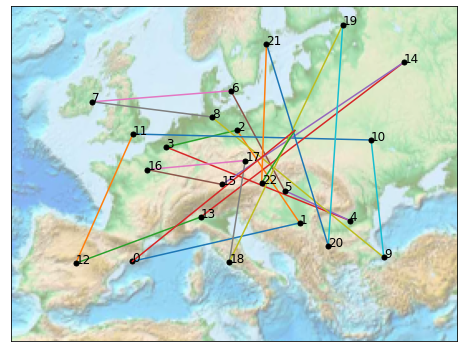

In [200]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

In [202]:
import numpy as np 
import matplotlib.pyplot as plt
from itertools import permutations
import time 

In [221]:
#Implementation of the exhaustive method 


def exhaustive_method(data):
    #Here we apply the shape and len of our cities to two list N and Order 
    N = np.shape(data)[0]
    Order = np.arange(N)
    
    #This will be the total distance we will be calculating 
    
    distance = 0
    """
    Here its mostly just tuple manipulation and we are going through every city distance value and adding them to the total
    """
    for i in range(N - 1):
        distance += data[Order[i]][Order[i + 1]]
    distance += data[Order[N-1]][Order[0]]
    
    """
    Now here is where the exhaustive method is being used: permutations allows us to shuffle the values in the arrays.
    So we use the same method as before with a new distance called posDistance 
    """
    for nOrder in permutations(range(N)):
        posDistance = 0
        for i in range(N - 1):
            posDistance += data[nOrder[i]][nOrder[i + 1]]
        posDistance += data[nOrder[N-1]][nOrder[0]]
        
        """
        Finally we compare the two distances and take the one that is smallest, this will be running continiously for every 
        distance in the excel file and keep replacing the distance value, Order then gets changed with the newOrder we obtain in 
        permutations 
        """
        if posDistance < distance:
            distance = posDistance
            Order = nOrder

    return Order, distance


        

It will go from: ['Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels'] and the total distance is 5018.8099999999995
The time it took to compute this is 0.0014562606811523438 seconds


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


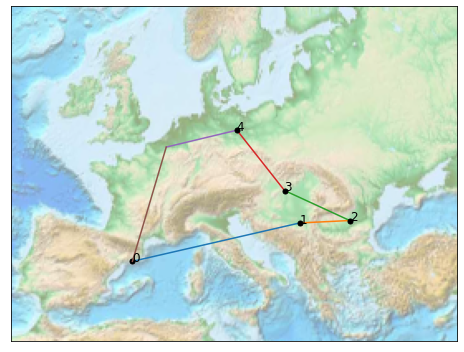

In [222]:
#This here is the list for 6 cities that we will be computing 
shortened_graph = []
shortened_plan = []

for index in range(6):
    shortened_graph.append(data[index])

#Find out the time that it takes to compute this
start_time = time.time()
city_Order, distance  = exhaustive_method(shortened_graph)
end_time = time.time()

#Then we convert the Order of cities to it corresponding city names
for index in range(6):
    shortened_plan.append(plan[city_Order[index]])

print(f"It will go from: {shortened_plan} and the total distance is {distance}")
print(f"The time it took to compute this is {end_time - start_time} seconds")
plot_plan(shortened_plan)

It will go from: ['Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin'] and the total distance is 7486.309999999999
The time it took to compute this is 9.979518175125122 seconds


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


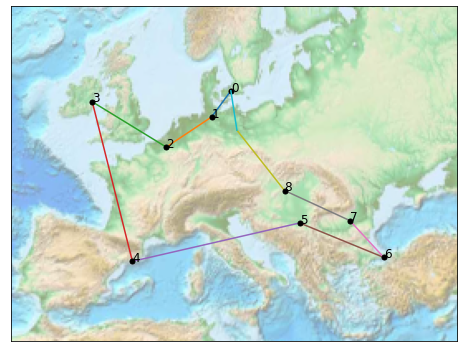

In [223]:
#This is for computing 10 cities
longer_graph = []
longer_plan = []


for index in range(10):
    longer_graph.append(data[index])

#Finding the total time it takes to compute this 
start_time = time.time()
Ncity_Order, Ndistance  = exhaustive_method(longer_graph)
end_time = time.time()

#Convert the list of cities to its corresponding names
for index in range(10):
    longer_plan.append(plan[Ncity_Order[index]])

print(f"It will go from: {longer_plan} and the total distance is {Ndistance}")
print(f"The time it took to compute this is {end_time - start_time} seconds")

plot_plan(longer_plan)

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [224]:
import math as math
print(f"It would take about {math.factorial(24)/(math.factorial(10)*60*60*24*365)} years to run this")


It would take about 5421706833.008219 years to run this


## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [207]:
#Implementation of the hill climbing method 

def hill(data):
    
    N = np.shape(data)[0] 
    Order = np.arange(N)
    """
    This is necessary for the hill climbing calculation so we dont get stuck with a single answer as such running a random
    shuffle keep the city order in check 
    """
    np.random.shuffle(Order)
    
    """
    Here we apply the same method as in exhaustive method, we find the total sum of the entire array list
    """
    distance = 0
    for i in range(N-1):
        distance += data[Order[i]][Order[i+1]]
    distance += data[Order[N-1]][Order[0]]
        
    
    #Here is where the hill climbing takes part
    for i in range(1000):
        
        #We first calculate the random order of cities we will be selecting to switch N times
        rand_num0 = np.random.randint(N)
        rand_num1 = np.random.randint(N)
        
        #Making sure that the random order isnt the same
        if rand_num0 != rand_num1:
        
            #Then we apply the shuffle between the two random orders we have given
            posOrder = Order.copy()
            posOrder[[rand_num0,rand_num1]] = posOrder[[rand_num1,rand_num0]]
            
            #Then same system as in exhaustive method we apply a new possibleDistance and compute its sum
            posDistance = 0
            for j in range(N - 1):
                posDistance += data[posOrder[j]][posOrder[j+1]]
            posDistance += data[posOrder[N-1]][posOrder[0]]
            
            #Same as before. We find the shortnest distance and its corresponding order
            if posDistance < distance:
                distance = posDistance
                Order = posOrder
                
    return Order, distance


Hill climbing method found this list :['Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin', 'Copenhagen', 'Hamburg', 'Brussels'] with a total distance of 7486.31
It took 0.014139413833618164 seconds to compute this


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


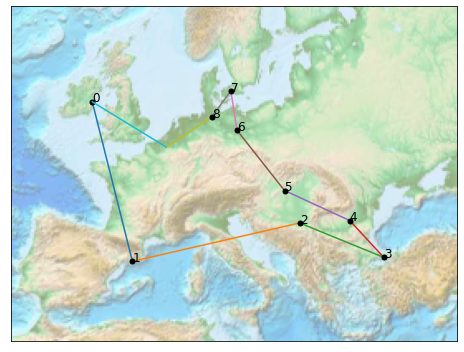

In [208]:
#This is for 10 cities
startT = time.time()
city, dis = hill(longer_graph)
endT = time.time()
#This here is for the shortened version of the data

short_hill_plan = []
for index in range(len(city)):
    short_hill_plan.append(plan[city[index]])

print(f"Hill climbing method found this list :{short_hill_plan} with a total distance of {dis}")    
print(f"It took {endT - startT} seconds to compute this")
plot_plan(short_hill_plan)

Hill climbing method found this list :['Madrid', 'Barcelona', 'Rome', 'Budapest', 'Kiev', 'Moscow', 'Saint Petersburg', 'Stockholm', 'Dublin', 'London', 'Paris', 'Brussels', 'Belgrade', 'Sofia', 'Istanbul', 'Bucharest', 'Warsaw', 'Copenhagen', 'Hamburg', 'Berlin', 'Prague', 'Vienna', 'Munich', 'Milan'] with a total distance of 15064.029999999999
It took 0.01934504508972168 seconds to compute this


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


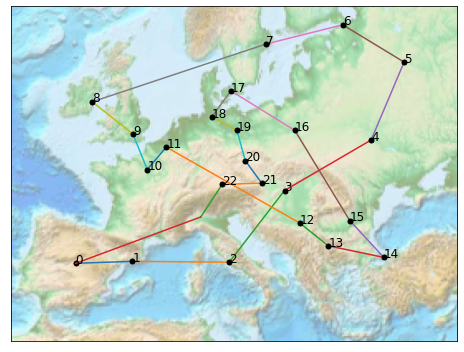

In [209]:
# Here is the full 24
startT = time.time()
Ncity, Ndis= hill(data)
endT = time.time()

hill_plan = []

for index in range(len(data)):
    hill_plan.append(plan[Ncity[index]])

print(f"Hill climbing method found this list :{hill_plan} with a total distance of {Ndis}")    
print(f"It took {endT - startT} seconds to compute this")
plot_plan(hill_plan)


## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [265]:
import sys
#This is mostly to just keep track of each generation
np.random.seed(1821)

"""
A short explanation of the general idea behind genetic algorithm. GA works a lot in the same method of how organisms live in 
nature i.e those who best adapt to the current enviroment will make offspring and thus give their traits to said offsprings
those traits being called mutations.
GA code take a population and puts it through the enviroment, in this case the enviroment being the goal of finding the least 
distance possible.
"""

"""
Here we start by creating a random population, and the data being the excel file we recieved. Parents are the surviving members
for the next generation. Score being the total distance in our question, and best is the best gene that we iterated aka the 
order of cities that we will travel.
"""
class Population():
    def __init__(self, population, data):
        self.population = population
        self.parents = []
        self.score = 0
        self.best = None
        self.data = data
    """
    fitness just finds the sum of all possible distances between two cities in the data    
    """
    def fitness(self, gene):
        return sum([self.data[gene[i], gene[i + 1]] for i in range(len(gene) - 1)])

    """
    Evaluate allows us to find the one with the shortest distance between two cities and adds that to the best score/parent.
    The last lines makes it so the worst gene gets removed
    """
    def evaluate(self):
        distances = np.asarray([self.fitness(gene) for gene in self.population])
        self.score = np.min(distances)
        self.best = self.population[distances.tolist().index(self.score)]
        self.parents.append(self.best)
        if False in (distances[0] == distances):
            distances = np.max(distances) - distances
        return distances / np.sum(distances)

    """
    Selection takes the surviving genes of evaluate and puts them through a random number trial in which only 4 shall survive
    to the next generation. It is important to not set parent to too high of a number or else we might get stuck with a bad
    output the same applies vice versa
    """
    def select(self, parent = 6):
        fit = self.evaluate()
        while len(self.parents) < parent:
            rand = np.random.randint(0, len(fit))
            if fit[rand] > np.random.rand():
                self.parents.append(self.population[idx])
        self.parents = np.asarray(self.parents)

    """
    Crossover_mutation takes parents that made it to the next generation gives their children a random amount of their genes.
    Genes being the list array of the city order. We also make sure that we dont have the same numbers printed out as to avoid
    coming back to the same place.
    """
    def crossover_mutation(self, cross=0.1):
        children = []
        count, size = self.parents.shape
        for _ in range(len(self.population)):
            if np.random.rand() > cross:
                children.append(list(self.parents[np.random.randint(count, size=1)[0]]))
            else:
                parent1, parent2 = self.parents[np.random.randint(count, size=2), :]
                
                rand = np.random.choice(range(size), size=2, replace=False)
                start, end = min(rand), max(rand)
                child = [None] * size
                for i in range(start, end + 1, 1):
                    child[i] = parent1[i]
                pointer = 0
                for i in range(size):
                    if child[i] is None:
                        while parent2[pointer] in child:
                            pointer += 1
                        child[i] = parent2[pointer]
                children.append(child)
        return children

    
    """
    Here it takes in the crossover data and apply a random chance of said mutation to make it through to the next generation.
    This chance can be manipulated and then a new population is then created
    """
    def mutation(self, cross=0.1, mut=0.1):
        new_population = []
        children = self.crossover_mutation(cross)
        for child in children:
            if np.random.rand() < mut:
                new_population.append(swap(child))
            else:
                new_population.append(child)
        return new_population

"""
Here is a simple method of generating all the permutations of the possible cities. Those permutations becomes the population 
"""
def init_population(cities, data, n_population):
    return Population(np.asarray([np.random.permutation(cities) for _ in range(n_population)]),data)

"""
Swap is the mutation it simply swaps a random gene or in our case a number in the array or population
"""
def swap(gene):
    a, b = np.random.choice(len(gene), 2)
    gene[a], gene[b] = (gene[b],gene[a],)
    return gene

"""
Here we just add all the information we gathered and find the best score and its array 
"""
def genetic_algorithm(cities, data, n_population = 6, generations = 30, reducer = 20, cross = 0.5, mut = 0.5,):
    pop = init_population(cities, data, n_population)
    best = pop.best
    score = sys.maxsize #Just a big number 

    for i in range(generations):
        #reducer simply acts as a way to even more thin down the numbers to get a better result with fewer generations
        pop.select(n_population/reducer)

        if pop.score < score:
            best = pop.best
            score = pop.score
            
        children = pop.mutation(cross, mut)
        pop = Population(children, pop.data)
    
    print(f"After {generations} Generations the total distance is {score}")
    return best


In [266]:
#This here is for printing out the full 24 cities
nCities = np.shape(data)[0]
cities = np.arange(nCities)

#For printing out the first 10 cities
short_cities = cities[:10]


#Taking the shortened data and the data
data = np.asarray(data)
short_data = np.asarray(data[:10])

#Finding the time it will take to compute
startT = time.time()
short_GA_cities = genetic_algorithm(short_cities,short_data)
endT = time.time()

#Same as before, we convert the corresponding array to its city 
s_GA_plan = []
for index in range(len(short_cities)):
    s_GA_plan.append(plan[short_GA_cities[index]])

print(f"The order of 10 cities that GA computed is {s_GA_plan}")
print(f"Total time was {endT - startT}")

#We repeat the process for the 24 cities
startT = time.time()
GA_cities = genetic_algorithm(cities, data)
endT = time.time()

GA_plan = []

for index in range(len(cities)):
    GA_plan.append(plan[GA_cities[index]])

print(f"The order of 24 cities that GA computed is {GA_plan}")    
print(f"Total time was {endT - startT}")


After 30 Generations the total distance is 6852.33
The order of 10 cities that GA computed is ['Berlin', 'Budapest', 'Belgrade', 'Istanbul', 'Bucharest', 'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona']
Total time was 0.016928911209106445
After 30 Generations the total distance is 18987.430000000004
The order of 24 cities that GA computed is ['Dublin', 'Barcelona', 'Madrid', 'Munich', 'Brussels', 'Copenhagen', 'Saint Petersburg', 'Moscow', 'Sofia', 'Kiev', 'Istanbul', 'Bucharest', 'Budapest', 'Warsaw', 'Vienna', 'Milan', 'Paris', 'London', 'Prague', 'Belgrade', 'Rome', 'Berlin', 'Hamburg', 'Stockholm']
Total time was 0.018373727798461914


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


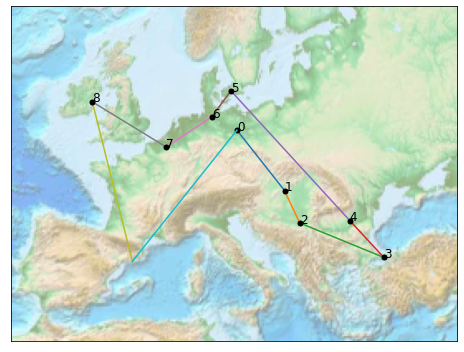

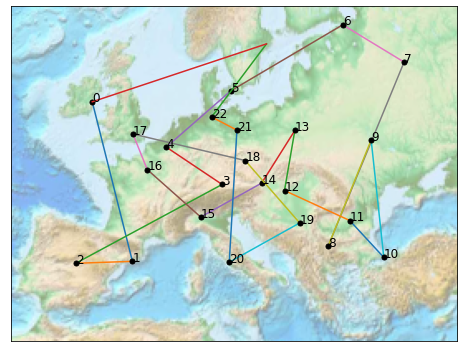

In [267]:
plot_plan(s_GA_plan)
plot_plan(GA_plan)

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

For the 10 cities GA came fairly close to the exhaustive method and it was in a much shorter time. As for the 24 cities it is fairly obvious that GA did exponentially better as it took 11ms to compute whilst exhaustive method would take longer to compute than the Andromeda galaxy crashing with our solar system or take around the same time as it will take for the sun to explode.